<a href="https://colab.research.google.com/github/ashwin-r-k/learning_ML/blob/master/mlfe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
 !wget https://raw.githubusercontent.com/ashwin-r-k/learning_ML/master/magic04.data

--2023-12-22 04:32:41--  https://raw.githubusercontent.com/ashwin-r-k/learning_ML/master/magic04.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [text/plain]
Saving to: ‘magic04.data’

magic04.data        100%[===================>]   1.41M  --.-KB/s    in 0.03s   

2023-12-22 04:32:41 (53.7 MB/s) - ‘magic04.data’ saved [1477391/1477391]



In [2]:
from imblearn.over_sampling import RandomOverSampler

In [3]:
cols = ["fLength","fWidth","fSize", "fConc", "fConcl", "fAsym", "fMllong", "fX3Trans", "fAlpha",  "fDist", "class"]
df = pd.read_csv("magic04.data",names=cols)

In [4]:
df["class"] = (df["class"]=="g").astype(int)

In [5]:
print(df)

        fLength    fWidth   fSize   fConc  fConcl     fAsym   fMllong  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fX3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610 

In [6]:
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fMllong,fX3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


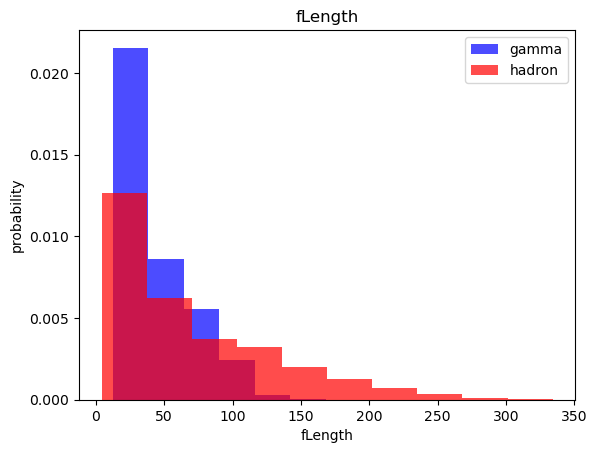

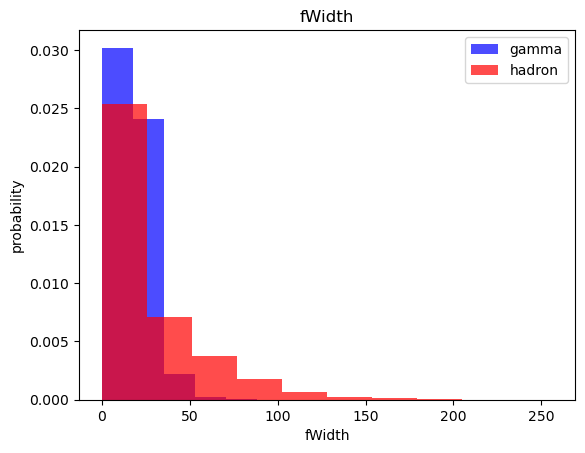

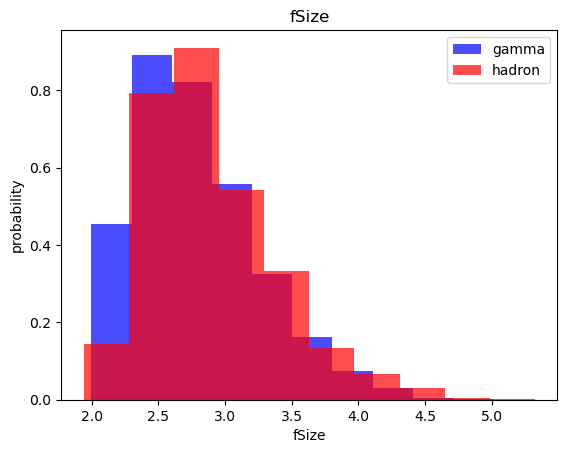

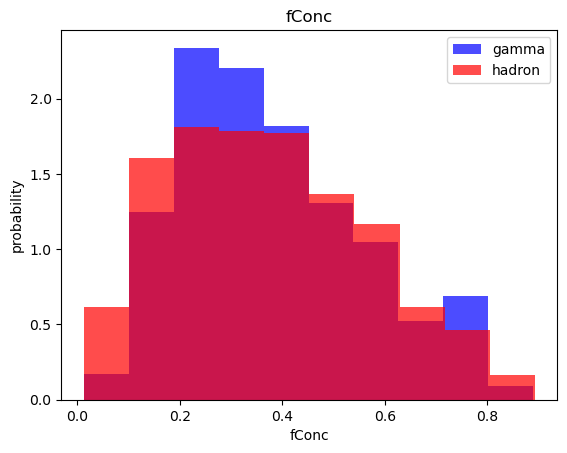

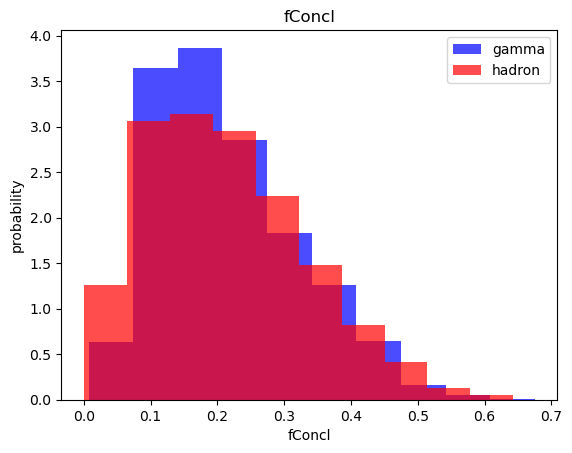

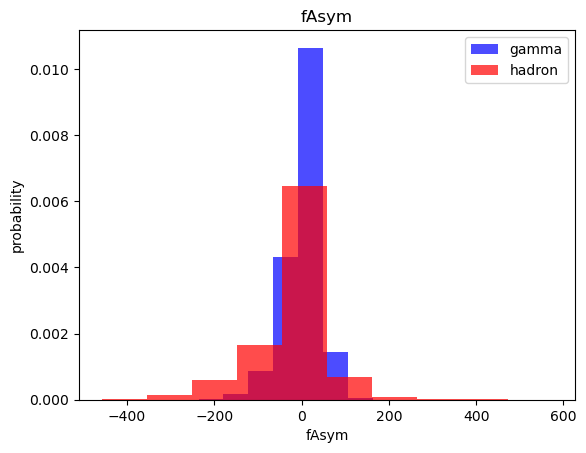

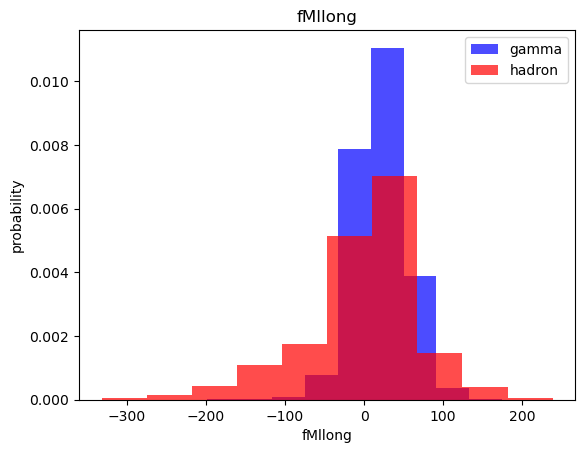

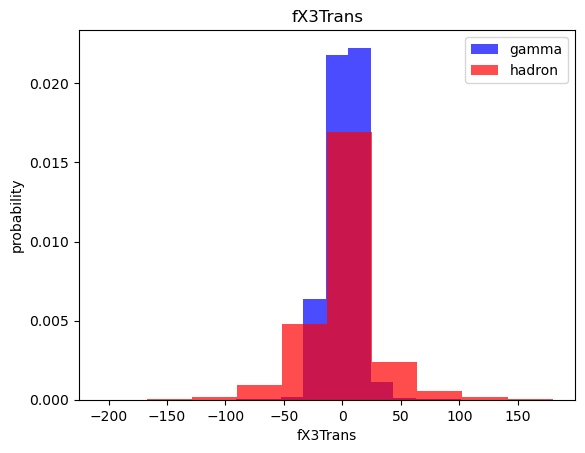

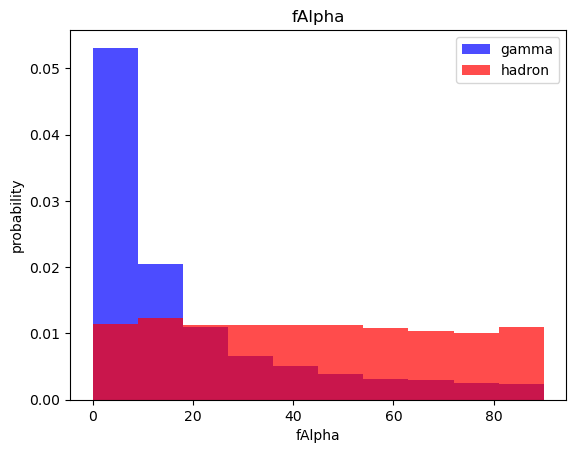

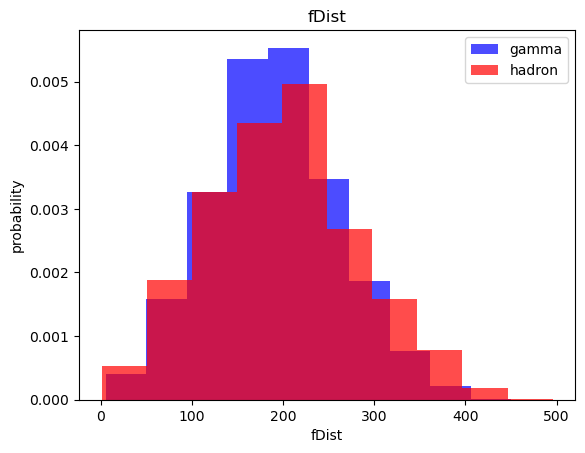

In [7]:
for label in cols[:-1]:
    plt.hist( df[ df["class"]==1 ][label], color="blue" , label="gamma" , alpha = 0.7,density=True  )
    plt.hist( df[ df["class"]==0 ][label], color="red" , label="hadron" , alpha = 0.7,density=True  )
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("probability")
    plt.legend()
    plt.show()

# Train, valiition , Test data set.


In [8]:
train, valid, test = np.split( df.sample(frac=1) , [int(0.6*len(df)), int(0.8*len(df)) ] )

/home/ashwin/.conda/envs/ml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
# how we have to scale the data to get propper result else it will beprint( not accurete predication
print(train)

        fLength   fWidth   fSize   fConc  fConcl    fAsym   fMllong  fX3Trans  \
13729  141.0030  66.9750  3.1455  0.2217  0.1141  92.3030  156.0470   36.4384   
5970    32.2216  17.8540  2.8357  0.3182  0.1613  20.0564   16.8922  -13.9134   
4428    35.0679  12.2035  2.3314  0.4942  0.2960   1.2236    5.6228   -6.3181   
5869    36.4971  18.5960  2.6924  0.3452  0.1898  19.1104   23.7937  -14.7142   
5193    20.4089  11.3508  2.3181  0.6010  0.3245  19.5285   19.6055  -10.5022   
...         ...      ...     ...     ...     ...      ...       ...       ...   
5797    18.7087  16.3364  2.2999  0.4862  0.2431  11.5524   17.6719  -11.0034   
1620    34.6640  12.5674  2.6454  0.3914  0.2251  11.6629   28.1683    8.6285   
17031  171.0088  60.9908  3.1721  0.2225  0.1214  74.1999  194.6039  -24.1557   
17266   25.5669  14.2810  2.5447  0.3880  0.2097 -18.5610   -9.2701    1.9799   
1679    24.5394  14.7391  2.6484  0.4854  0.2753  -1.0812   23.3631   -6.8022   

        fAlpha     fDist  c

In [10]:
def scaledataset(dataframe,oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(X)

    if oversample:
      ros = RandomOverSampler()
      X, y = ros.fit_resample(X,y)

    data = np.hstack((X, np.reshape(y,(-1,1) )))
        #-1 means the len(y)
    return data, X, y

In [11]:
print(len(train [ train["class"] == 1])) # Gamas
print(len(train [ train["class"] == 0])) #Hadrons

# So now we have to over sample the data as the numbers of Hadron data is very less

7429
3983


In [12]:
train, X_train, y_train = scaledataset(train,oversample=True)
test, x_test, y_test = scaledataset(test,oversample=False)
valid, x_valid, y_valid = scaledataset(valid,oversample=False)

In [24]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:

y_predict = knn_model.predict(x_test)


In [ ]:
y_predict

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
y_test

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1342
           1       0.84      0.82      0.83      2462

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1342
           1       0.84      0.82      0.83      2462

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1342
           1       0.84      0.82      0.83      2462

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()

In [ ]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_predict = nb_model.predict(x_test)

In [25]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1319
           1       0.87      0.87      0.87      2485

    accuracy                           0.83      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



# SVM

In [17]:
from sklearn.svm import SVC

In [18]:
%%time
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

CPU times: user 8.86 s, sys: 144 ms, total: 9 s
Wall time: 9.39 s


In [22]:
y_predict = svm_model.predict(x_test)

In [27]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1319
           1       0.87      0.87      0.87      2485

    accuracy                           0.83      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



# Neural Network

In [31]:
import tensorflow as tf

In [32]:

def plot_loss_accuracy(history):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))

    ax1.plot(history.history['loss'],label='loss' )
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_ylabel('Binary crossentropy')
    ax1.set_xlabel('Epoch')


    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'],label='accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')

    ax1.legend()
    ax1.grid(True)
    ax2.legend()
    ax2.grid(True)

    plt.show()

In [33]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
    ])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy", metrics=['accuracy'])

2023-12-22 11:03:53.570494: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [43]:
%%time
history = nn_model.fit(
    X_train,y_train,epochs=100,batch_size=32,validation_split=0.2
)

Epoch 1/100
372/372 [==============================] - 4s 8ms/step - loss: 0.9316 - accuracy: 0.6998 - val_loss: 0.6203 - val_accuracy: 0.6945
Epoch 2/100
372/372 [==============================] - 3s 8ms/step - loss: 0.5190 - accuracy: 0.7553 - val_loss: 0.5754 - val_accuracy: 0.7100
Epoch 3/100
372/372 [==============================] - 2s 6ms/step - loss: 0.4817 - accuracy: 0.7777 - val_loss: 0.4239 - val_accuracy: 0.7951
Epoch 4/100
372/372 [==============================] - 3s 7ms/step - loss: 0.4649 - accuracy: 0.7863 - val_loss: 0.7052 - val_accuracy: 0.5646
Epoch 5/100
372/372 [==============================] - 2s 7ms/step - loss: 0.4474 - accuracy: 0.7944 - val_loss: 1.0352 - val_accuracy: 0.4256
Epoch 6/100
372/372 [==============================] - 3s 7ms/step - loss: 0.4444 - accuracy: 0.7964 - val_loss: 0.7492 - val_accuracy: 0.5622
Epoch 7/100
372/372 [==============================] - 3s 7ms/step - loss: 0.4412 - accuracy: 0.7992 - val_loss: 0.3353 - val_accuracy: 0.8439

In [1]:
plot_loss_accuracy(history)

NameError: ignored

In [36]:
from tqdm.keras import TqdmCallback
def trainmodel(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
    nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation="relu"),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes,activation="relu"),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1,activation="sigmoid")

    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss="binary_crossentropy", metrics=['accuracy'] )

    history = nn_model.fit(
        X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0, callbacks=[TqdmCallback(verbose=1)]
    )
    return nn_model, history


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

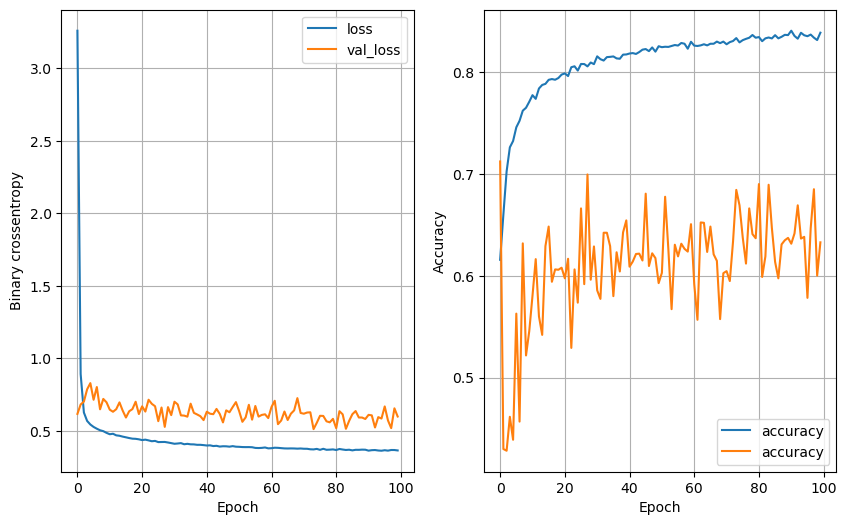

CPU times: user 3min 20s, sys: 46.2 s, total: 4min 6s
Wall time: 2min 42s


In [37]:
%%time
epochs=100
num_nodes,dropout_prob,lr,batch_size = 64,0.2,0.001,64
model, history = trainmodel(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
plot_loss_accuracy(history)

In [ ]:
%%time
least_val_loss = float('inf')
least_nn_model = None

epochs=50

for num_nodes in  [8,16,32]:
    for dropout_prob in [0 , 0.2]:
        for lr in  [0.01, 0.005, 0.001]:
            for batch_size in [32, 64]:
                print(f'Batch size: {batch_size} , lr: {lr}, dropout prob: {dropout_prob}, numnode: {num_nodes} ')
                model, history = trainmodel(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
                #plot_loss_accuracy(history)

                val_loss = model.evaluate(x_valid,y_valid )[0]
                if val_loss < least_val_loss:
                    least_val_loss=val_loss
                    least_nn_model=model








119/119 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.7829


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7861b0d567a0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


119/119 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7831


In [15]:
y_predict = least_nn_model.predict(x_valid)
print(y_predict)
y_predict = (y_predict>0.5).astype('int')
print(y_predict)

NameError: name 'least_nn_model' is not defined

In [26]:
y_predict = (y_predict>0.5).astype('int')
print(y_predict)

[1 1 0 ... 1 1 0]


In [28]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1319
           1       0.87      0.87      0.87      2485

    accuracy                           0.83      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



In [44]:
y_predict = model.predict(x_test)
print(y_predict)
y_predict = (y_predict>0.5).astype('int').reshape(-1)
print(y_predict)
print(classification_report(y_test,y_predict))

119/119 [==============================] - 0s 4ms/step
[[0.92571855]
 [0.99408406]
 [0.32733196]
 ...
 [0.97847104]
 [0.9028253 ]
 [0.03465934]]
[1 1 0 ... 1 1 0]
              precision    recall  f1-score   support

           0       0.92      0.64      0.76      1319
           1       0.84      0.97      0.90      2485

    accuracy                           0.86      3804
   macro avg       0.88      0.81      0.83      3804
weighted avg       0.86      0.86      0.85      3804

